In [2]:
# This code takes in the .out files generated from rmsd.tcl and computes the BEST RMSD fits 
# between WNT1/3a/5a and WNT8a. Output is a csv file containing a three column table: 1st column
# contains each WNT1/3a/5a index and the 2nd column contains the WNT8A residue index that best maps 
# to the WNT1/3a/5a residue. The third column is the RMSD value of that fit. Example below:
#
# WNT1/3a/5a INDEX  | WNT8A INDEX | RMSD FIT
#       22          |     55      |    2.9
# .............................................
#
##############
# PURPOSE
##############
# .out files generated contain all possible RMSD fits between WNT1/3a/5a and WNT8a.
# The first column of each row is the index of the residue being fit to on WNT1/3a/5a
# Then, the RMSD fit to each possible residue on WNT8a is output in subsequent columns
#
##############
# HOW RMSD FITTING WORKS
##############
#
# We consider RMSD fits between N residue sequences on WNT1/3a/5a and WNT8.
#
# For Example: We fit residue 60 on WNT1 (residues 40-80) to all possible 20 residue sequences on WNT8a
#
# We take the residue range as follows:
#
# X = Current WNT residue
# N = Sequence Length cutoff.
# A, B = Start/END idx of WNT
# 
#
# IF X - N < A:
#      RANGE = [X, X+2N]
# IF X + N > B:
#      RANGE = [X-2N, X]
# ELSE:
#      RANGE = [X-N, X+N]


import numpy as np
import pandas as pd

# Selector - change SYSTEM variable to generate mappings for each system (1/3a/5a/8a)
SYSTEM = "1"
if SYSTEM == "1":
    fitwnt = [32,369]
if SYSTEM == "3a":
    fitwnt = [19,352]
if SYSTEM == "5a":
    fitwnt = [44,380]
if SYSTEM == "8a":
    fitwnt = [22,337]


In [16]:
refwnt = [22,337] # Indeces of wnt8a (protein we are mapping to)

offset = 20 # Preselected offset for rmsd fitting (20 = rmsd fitting done over ranges of 20 residues)

align_res100 = np.ones((fitwnt[1] - fitwnt[0] + 1, refwnt[1] - refwnt[0] - offset*2 + 1 + 2 )) * 500
print(align_res100.shape)

# Read in the mappings generated by tcl script
with open(f"output/{SYSTEM}_to_8a_jie.out", "r") as file:
    curr_line = 0
    for line in file:
        
        sp = line.split()
        #print(c, len(sp))
        align_res100[curr_line,0:len(sp)] = sp
        curr_line = curr_line + 1
        #print(curr_line, sp[0])

hashmap= []
rmsd_cutoff = 10 # RMSD Cutoff, if best rmsd fit is greater than rmsd_cutoff -> mapping idx is set to -1 (no fit)

# For each pairing, check to see what the RMSD of the associated fit was
# Find the minimum RMSD fitting value -> assign idx as best fit/mapping
for i in range(len(align_res100)):
        #fit_index = fitwnt[0]+i
        fit_index = align_res100[i,0]
        ref_index_at_min_rmsd = np.argmin(align_res100[i,2:])+align_res100[i,1]
        #min_rmsd = align_res100[i,2+np.argmin(align_res100[i,2:])]
        min_rmsd = np.min(align_res100[i,2:])
        if min_rmsd > rmsd_cutoff:
            hashmap.append([fit_index, -1, min_rmsd])
        else:
            hashmap.append([fit_index, ref_index_at_min_rmsd, min_rmsd])
        
# Output the mapping as a CSV file
hashmap = np.array(hashmap)
hashmap_df = pd.DataFrame(hashmap, columns=[SYSTEM,'8a','rmsd'])
hashmap_df[SYSTEM] = hashmap_df[SYSTEM].astype(int)
hashmap_df["8a"] = hashmap_df["8a"].astype(int)
hashmap_df.to_csv(f"output/{SYSTEM}_to_8a_map_jie.csv", index=False)
hashmap_df

(338, 278)


,1,8a,rmsd
0,32,-1,18.108730
1,33,-1,17.990137
2,34,-1,17.898357
3,35,-1,17.893858
4,36,-1,17.896048
...,...,...,...
333,365,332,5.236629
334,366,333,5.113842
335,367,334,5.050381
336,368,335,5.090091


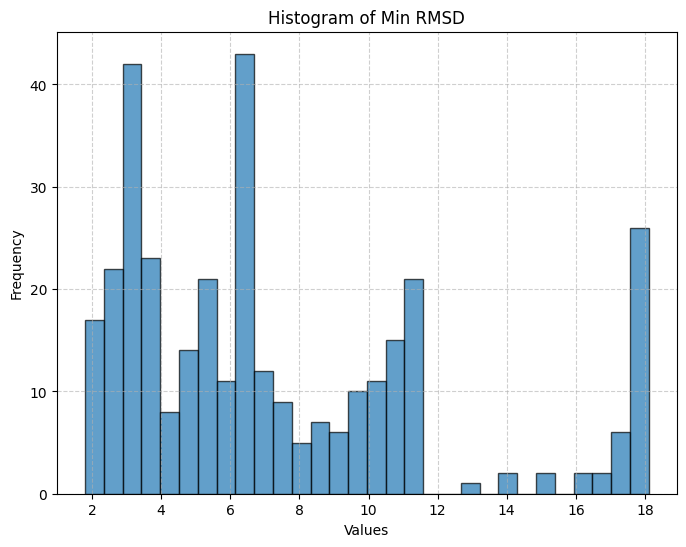

In [15]:
import matplotlib.pyplot as plt


# Plot the histogram of df['a']
plt.figure(figsize=(8, 6))
plt.hist(hashmap_df['rmsd'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Min RMSD")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 3a


In [20]:
# Selector - change SYSTEM variable to generate mappings for each system (1/3a/5a/8a)
SYSTEM = "3a"
if SYSTEM == "1":
    fitwnt = [32,369]
if SYSTEM == "3a":
    fitwnt = [19,352]
if SYSTEM == "5a":
    fitwnt = [44,380]
if SYSTEM == "8a":
    fitwnt = [22,337]


In [21]:
refwnt = [22,337] # Indeces of wnt8a (protein we are mapping to)

offset = 20 # Preselected offset for rmsd fitting (20 = rmsd fitting done over ranges of 20 residues)

align_res100 = np.ones((fitwnt[1] - fitwnt[0] + 1, refwnt[1] - refwnt[0] - offset*2 + 1 + 2 )) * 500
print(align_res100.shape)

# Read in the mappings generated by tcl script
with open(f"output/{SYSTEM}_to_8a_jie.out", "r") as file:
    curr_line = 0
    for line in file:
        
        sp = line.split()
        #print(c, len(sp))
        align_res100[curr_line,0:len(sp)] = sp
        curr_line = curr_line + 1
        #print(curr_line, sp[0])

hashmap= []
rmsd_cutoff = 10 # RMSD Cutoff, if best rmsd fit is greater than rmsd_cutoff -> mapping idx is set to -1 (no fit)

# For each pairing, check to see what the RMSD of the associated fit was
# Find the minimum RMSD fitting value -> assign idx as best fit/mapping
for i in range(len(align_res100)):
        #fit_index = fitwnt[0]+i
        fit_index = align_res100[i,0]
        ref_index_at_min_rmsd = np.argmin(align_res100[i,2:])+align_res100[i,1]
        #min_rmsd = align_res100[i,2+np.argmin(align_res100[i,2:])]
        min_rmsd = np.min(align_res100[i,2:])
        if min_rmsd > rmsd_cutoff:
            hashmap.append([fit_index, -1, min_rmsd])
        else:
            hashmap.append([fit_index, ref_index_at_min_rmsd, min_rmsd])
        
# Output the mapping as a CSV file
hashmap = np.array(hashmap)
hashmap_df = pd.DataFrame(hashmap, columns=[SYSTEM,'8a','rmsd'])
hashmap_df[SYSTEM] = hashmap_df[SYSTEM].astype(int)
hashmap_df["8a"] = hashmap_df["8a"].astype(int)
hashmap_df.to_csv(f"output/{SYSTEM}_to_8a_map_jie.csv", index=False)
hashmap_df

(334, 278)


,3a,8a,rmsd
0,19,-1,16.417828
1,20,-1,16.300447
2,21,-1,16.131750
3,22,-1,16.001284
4,23,-1,15.936543
...,...,...,...
329,348,333,5.111524
330,349,334,5.047615
331,350,335,5.087644
332,351,336,5.020895


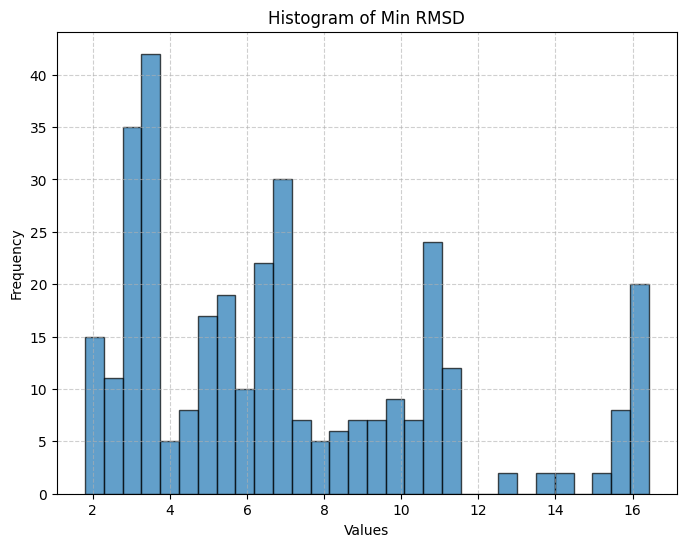

In [22]:
import matplotlib.pyplot as plt


# Plot the histogram of df['a']
plt.figure(figsize=(8, 6))
plt.hist(hashmap_df['rmsd'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Min RMSD")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 5a


In [17]:
# Selector - change SYSTEM variable to generate mappings for each system (1/3a/5a/8a)
SYSTEM = "5a"
if SYSTEM == "1":
    fitwnt = [32,369]
if SYSTEM == "3a":
    fitwnt = [19,352]
if SYSTEM == "5a":
    fitwnt = [44,380]
if SYSTEM == "8a":
    fitwnt = [22,337]


In [18]:
refwnt = [22,337] # Indeces of wnt8a (protein we are mapping to)

offset = 20 # Preselected offset for rmsd fitting (20 = rmsd fitting done over ranges of 20 residues)

align_res100 = np.ones((fitwnt[1] - fitwnt[0] + 1, refwnt[1] - refwnt[0] - offset*2 + 1 + 2 )) * 500
print(align_res100.shape)

# Read in the mappings generated by tcl script
with open(f"output/{SYSTEM}_to_8a_jie.out", "r") as file:
    curr_line = 0
    for line in file:
        
        sp = line.split()
        #print(c, len(sp))
        align_res100[curr_line,0:len(sp)] = sp
        curr_line = curr_line + 1
        #print(curr_line, sp[0])

hashmap= []
rmsd_cutoff = 10 # RMSD Cutoff, if best rmsd fit is greater than rmsd_cutoff -> mapping idx is set to -1 (no fit)

# For each pairing, check to see what the RMSD of the associated fit was
# Find the minimum RMSD fitting value -> assign idx as best fit/mapping
for i in range(len(align_res100)):
        #fit_index = fitwnt[0]+i
        fit_index = align_res100[i,0]
        ref_index_at_min_rmsd = np.argmin(align_res100[i,2:])+align_res100[i,1]
        #min_rmsd = align_res100[i,2+np.argmin(align_res100[i,2:])]
        min_rmsd = np.min(align_res100[i,2:])
        if min_rmsd > rmsd_cutoff:
            hashmap.append([fit_index, -1, min_rmsd])
        else:
            hashmap.append([fit_index, ref_index_at_min_rmsd, min_rmsd])
        
# Output the mapping as a CSV file
hashmap = np.array(hashmap)
hashmap_df = pd.DataFrame(hashmap, columns=[SYSTEM,'8a','rmsd'])
hashmap_df[SYSTEM] = hashmap_df[SYSTEM].astype(int)
hashmap_df["8a"] = hashmap_df["8a"].astype(int)
hashmap_df.to_csv(f"output/{SYSTEM}_to_8a_map_jie.csv", index=False)
hashmap_df

(337, 278)


,5a,8a,rmsd
0,44,-1,16.509661
1,45,-1,16.477854
2,46,-1,16.421614
3,47,-1,16.414806
4,48,-1,16.418104
...,...,...,...
332,376,333,5.134058
333,377,334,5.068464
334,378,335,5.104045
335,379,336,5.037150


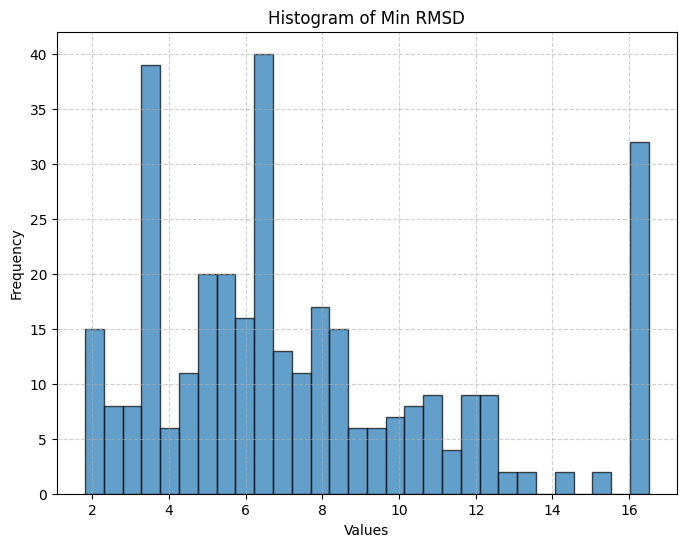

In [19]:
import matplotlib.pyplot as plt


# Plot the histogram of df['a']
plt.figure(figsize=(8, 6))
plt.hist(hashmap_df['rmsd'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Min RMSD")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()